In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
# Load data
us_df = pd.read_csv('../data/trajectories/steady_state/control_inputs_uniform.csv')
ys_df = pd.read_csv('../data/trajectories/steady_state/steady_state_ik_y-up.csv')
print(us_df.head())
print(ys_df.head())

   ID    u1    u2   u3    u4    u5   u6
0   0 -0.15 -0.15 -0.2 -0.15 -0.15 -0.2
1   1 -0.15 -0.15 -0.2 -0.15 -0.15  0.0
2   2 -0.15 -0.15 -0.2 -0.15 -0.15  0.2
3   3 -0.15 -0.15 -0.2 -0.15  0.00 -0.2
4   4 -0.15 -0.15 -0.2 -0.15  0.00  0.0
         x1        y1        z1        x2        y2        z2        x3  \
0  0.099408 -0.106652  0.104152  0.100146 -0.204320  0.104758  0.100296   
1  0.106960 -0.104326  0.099901  0.107172 -0.199658  0.105177  0.112519   
2  0.102378 -0.105111  0.102106  0.097044 -0.199044  0.098918  0.086223   
3  0.101192 -0.106624  0.104161  0.099396 -0.203264  0.111322  0.102750   
4  0.102844 -0.106269  0.102460  0.105243 -0.203288  0.100442  0.113583   

         y3        z3  
0 -0.320682  0.090002  
1 -0.313322  0.095101  
2 -0.302799  0.057739  
3 -0.317726  0.114055  
4 -0.316760  0.088728  


In [35]:
# We center the data, assuming first data point is the rest (vertical) position
ys_df = ys_df - ys_df.iloc[0]

In [36]:
def set_axes_equal(ax):
    """
    Make axes of 3D plot have equal scale so that spheres appear as spheres,
    cubes as cubes, etc.

    Input
      ax: a matplotlib axis, e.g., as output from plt.gca().
    """

    x_limits = ax.get_xlim3d()
    y_limits = ax.get_ylim3d()
    z_limits = ax.get_zlim3d()

    x_range = abs(x_limits[1] - x_limits[0])
    x_middle = np.mean(x_limits)
    y_range = abs(y_limits[1] - y_limits[0])
    y_middle = np.mean(y_limits)
    z_range = abs(z_limits[1] - z_limits[0])
    z_middle = np.mean(z_limits)

    # The plot bounding box is a sphere in the sense of the infinity
    # norm, hence I call half the max range the plot radius.
    plot_radius = 0.5*max([x_range, y_range, z_range])

    ax.set_xlim3d([x_middle - plot_radius, x_middle + plot_radius])
    ax.set_ylim3d([y_middle - plot_radius, y_middle + plot_radius])
    ax.set_zlim3d([z_middle - plot_radius, z_middle + plot_radius])

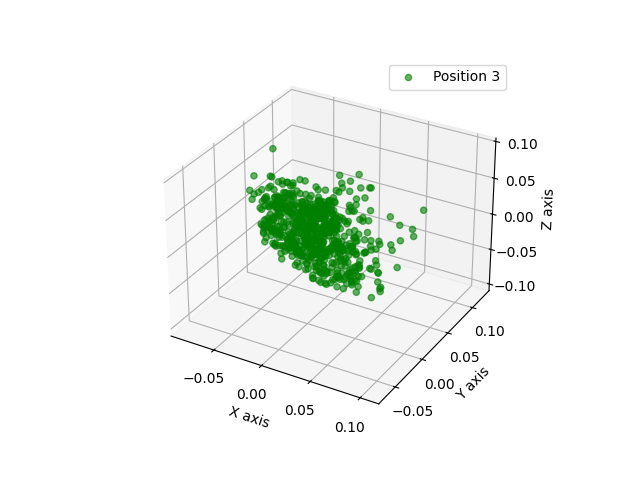

In [37]:
# Visualize data points
plt.close('all')

# Enable the ipympl backend for interactive plots
%matplotlib widget

z_dataframes = [ys_df]
position_colors = ['r', 'b', 'g']

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for z_df in z_dataframes:
    x1, y1, z1 = z_df['x1'], z_df['y1'], z_df['z1']
    x2, y2, z2 = z_df['x2'], z_df['y2'], z_df['z2']
    x3, y3, z3 = z_df['x3'], z_df['y3'], z_df['z3']
    # ax.scatter(x1, y1, z1, color=position_colors[0], label='Position 1', alpha=0.6)
    # ax.scatter(x2, y2, z2, color=position_colors[1], label='Position 2', alpha=0.6)
    ax.scatter(x3, y3, z3, color=position_colors[2], label='Position 3', alpha=0.6)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.legend()
set_axes_equal(ax)

In [21]:
# Convert to numpy
us = us_df.to_numpy()[:, 1:]
ys = ys_df.to_numpy()

# Split in train and test data
n = us.shape[0]
n_train = int(n * 0.8)
n_test = n - n_train

us_train = us[:n_train]
us_test = us[n_train:]

ys_train = ys[:n_train]
ys_test = ys[n_train:]

In [22]:
# Simple least squares to find G in u = G*y
G = np.linalg.lstsq(ys_train, us_train, rcond=None)[0].T

In [23]:
# Predict u_test using the learned G
us_pred = ys_test @ G.T

In [24]:
# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(np.mean(np.square(us_test - us_pred)))
print(f"Root Mean Squared Error on the test data: {rmse}")

Root Mean Squared Error on the test data: 0.06098293798468355


In [25]:
# Mean absolute error
mae = np.mean(np.abs(us_test - us_pred))
print(f"Mean Absolute Error on the test data: {mae}")

Mean Absolute Error on the test data: 0.045423903017693563


In [26]:
# For sense of scale, calculate the mean of |us|
mean_control_input = np.mean(np.abs(us))
print(f"Mean of the control inputs: {mean_control_input}")

Mean of the control inputs: 0.10992775286497257
